### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Шаг 1. Откроем файлы с данными и изучим общую информацию.

In [1]:
from pymystem3 import Mystem
m = Mystem()
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
column_names = ['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [5]:
df.set_axis(column_names, axis = 'columns',inplace = True)
df.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
percent_missing = df.isnull().sum()*100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
name,name,0.011965
platform,platform,0.000000
release_year,release_year,1.609333
genre,genre,0.011965
na_sales,na_sales,0.000000
eu_sales,eu_sales,0.000000
jp_sales,jp_sales,0.000000
other_sales,other_sales,0.000000
critic_score,critic_score,51.319174
user_score,user_score,40.089740


Имеем таблицу - историческую сводку о различных компьютерных играх, выпущенных до 2016 года. Названия столбцов привели к нижнему регистру. Наблюдается по 40% пропусков в столбцах "Общий рейтинг" и "Оценка пользователей", 51% пропусков (больше половины!) в столбце "Оценка критиков", 1,6%  пропусков в столбце "Год выхода" и одинаково малый процент пропусков в столбцах "Название" и "Жанр". Эти последние пропуски вызывают подозрения, скорее всего, в данных ошибки. Пропуски года выхода тоже требуют изучения. Пропуски в столбце "Рейтинг", возможно, означают, что игра не имеет возрастных ограничений. Что касается пропусков в столбцах оценок критиков и пользователей - возможно, они относятся к играм, вышедшим до определенного года, начиная с которого в индустрии появились соответствующие метрики. Поскольку даже первый взгляд на верхние 5 строк таблицы порождает сомнения в том, что игра вроде Super Mario Bros, вышедшая в 1985 году, никогда и никем не оценивалась. 

### Шаг 2. Подготовка данных

In [7]:
df[df['name'].isna()]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это явно ошибки. Нет никакого смысла дальше обрабатывать эти данные, никакой пользы для исследования от этих строк не будет.

In [8]:
df.dropna(subset=['name'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16713 non-null object
release_year    16444 non-null float64
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
other_sales     16713 non-null float64
critic_score    8137 non-null float64
user_score      10014 non-null object
rating          9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [9]:
df[df['release_year'].isna()]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
len(df[df['release_year'].isna()]['name'].unique())

232

Удивительно, что у всех этих игр пропущен год выпуска. 232 различные игры (но для разных платформ) остались без указания года выхода, при том что данные о продажах по этим играм есть. По-хорошему надо запрашивать недостающую информацию - все-таки 232 пункта (с вариантами - 269) - многовато для ручной обработки. Эти пропуски заполним нулями - строки с этими играми нельзя выбрасывать из таблицы: данные по продажам в зависимости от жанра пригодятся в дальнейшем.

In [11]:
df['release_year'] = df['release_year'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16713 non-null object
release_year    16713 non-null float64
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
other_sales     16713 non-null float64
critic_score    8137 non-null float64
user_score      10014 non-null object
rating          9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [12]:
df['release_year'] = df['release_year'].astype('int')
df.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Все значения целые. Посмотрим, есть ли характерная особенность у игр с пропусками в этом столбце.

In [14]:
df[df['critic_score'].isna()]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


На первый взгляд видны две полярности: либо игра слишком старая, либо почти не продается. 

In [15]:
df[df['release_year'] < 2006]['critic_score']

1         NaN
4         NaN
5         NaN
9         NaN
10        NaN
         ... 
16695    67.0
16697    53.0
16706     NaN
16708     NaN
16713     NaN
Name: critic_score, Length: 6380, dtype: float64

In [16]:
df[(df['release_year'] < 2000) & (df['critic_score'] >0)]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
52,Gran Turismo,PS,1997,Racing,4.02,3.87,2.54,0.52,96.0,8.7,E
65,Final Fantasy VII,PS,1997,Role-Playing,3.01,2.47,3.28,0.96,92.0,9.2,T
67,Gran Turismo 2,PS,1999,Racing,3.88,3.42,1.69,0.50,93.0,9,T
88,Final Fantasy VIII,PS,1999,Role-Playing,2.28,1.72,3.63,0.23,90.0,8.6,T
106,Tekken 3,PS,1998,Fighting,3.27,2.22,1.40,0.29,96.0,9.1,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,0,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16373,PDC World Championship Darts 2008,PSP,0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M


Предположение об отсутствии оценки критиков в связи с возрастом игры не подтверждается. Удивительно видеть без оценок "Марио", повторюсь. Это либо ошибки, либо просто отсутствие соответствующей оценки. Выбрасывать такие строки нельзя, они пригодятся в дальнейшей работе. Заполнять ненулевыми значениями эти пропуски тоже нельзя - критерии неизвестны. Придется заполнить нулями и иметь в виду, что дальнейшие исследования с использованием данных этого столбца строятся только на ненулевых значениях.

Можно использовать другое индикаторное значение, например, -1. Такой оценки точно нет, поэтому пересечения с возможными реальными значениями не будет.

In [17]:
df['critic_score'] = df['critic_score'].fillna(0)
df['critic_score'] = df['critic_score'].astype('int')
df.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,NaN


Значение tbd, которое видно в строке 16373 (игра PDC World Championship Darts 2008), означает To Be Determined, "К определению" или "Будет определено дополнительно, позже". Сайт metacritic, с которого или с подобного которому взяты данные, ставит эту аббревиатуру вместо оценки всем в данном случае играм, набравшим 4 и менее отзывов пользователей. Иными словами, какие-то оценки уже есть, но их пока недостаточно, чтобы вывести некое среднее. Эти аббревиатуры нужно обработать таким образом, чтобы вместо них были числа. При этом нулями их заменить нельзя: формально какие-то оценки у соответствующих игр есть. Нулями мы заменим Nan. Положительными значениями тоже не можем их заменить, поскольку такая замена исказит данные. Поэтому нужен какой-то индикатор, чтобы отделить эти оценки от просто пропусков. В качестве такого индикатора можно использовать -1.

In [18]:
df['user_score'] = df['user_score'].fillna(0)

In [19]:
df[df['user_score'] == 'tbd']

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0,tbd,E


In [20]:
def tbd(row):
    if row['user_score'] == 'tbd':
        row['user_score'] = -1
    return row['user_score']
# с помощью функции заменим tbd на -1

In [21]:
df['user_score'] = df.apply(tbd, axis = 1)
df.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16713 non-null object
release_year    16713 non-null int64
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
other_sales     16713 non-null float64
critic_score    16713 non-null int64
user_score      16713 non-null object
rating          9949 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


In [23]:
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16713 non-null object
release_year    16713 non-null int64
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
other_sales     16713 non-null float64
critic_score    16713 non-null int64
user_score      16713 non-null float64
rating          9949 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [24]:
df[df['user_score'] == -1]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0,-1.0,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,-1.0,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0,-1.0,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,-1.0,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73,-1.0,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,-1.0,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,-1.0,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,-1.0,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0,-1.0,E


Было 2424 строки с оценками tbd - стало 2424 строки с оценками -1. Остальные оценки могут быть дробными. Посмотрим на палитру.

In [25]:
df['user_score'].unique()

array([ 8. ,  0. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5, -1. ,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,
        4.9,  4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,
        4.4,  4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,
        2.5,  1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,
        3.8,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

Пока оставим дробными. В случае необходимости всегда можно будет поменять тип.

In [26]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Более подробное знакомство с категоризацией ESRB приводит к выводу, что Nan - это не "для всех", а пропуск. Также интересно взглянуть на игры с рейтингом 'RP': как следует из описания категорий, это означает, что «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу. Как дела с продажами у таких игр?

In [27]:
df[df['rating'] == 'RP']

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,0,Strategy,0.0,0.04,0.0,0.00,58,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63,6.8,RP
16180,WRC: FIA World Rally Championship,PC,0,Racing,0.0,0.01,0.0,0.00,65,0.0,RP


Вот так вот. Три игры, у всех есть какие-то продажи (очень незначительные) и оценки. Две из этих игр - без указания года выхода, так что по-хорошему их бы надо убрать из выборки: продавались мало, одна даже лишена пользовательских оценок; вероятно, в открытые продажи эти игры пошли уже под другим названием. Год указан только у Cold War, и здесь либо ошибка присвоения рейтинга, либо какая-то другая ошибка. Я эти строчки оставлю, но момент спорный.

In [28]:
df[df['rating'].isna()]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,NaN


я не геймер, но видеть без рейтинга "Марио", "Тетрис", Duck Hunt... ESRB была основана в 1994 году, но мы видим в фильтре игры гораздо более поздних годов выпуска. Организация негосударственная, издатель не обязан высылать туда свою игру на оценку - видимо, тоже лучше заменить Nan нулями.

In [29]:
df['rating'] = df['rating'].fillna(0)
df.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,0


In [30]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,0,31.38


In [31]:
df.duplicated().sum()

0

На этом этапе обработали пропуски:
- строки с пропусками в наименовании игры и жанре удалены;
- пропуски в годе выпуска заменены нулями, столбец приведен к типу int (в реальных условиях необходимо либо запрашивать уточнения, либо искать даты выхода вручную и вносить в таблицу);
- у пропусков в столбце "Оценка критиков" закономерности обнаружить не удалось. Пропуски заменены нулями, столбец приведен к типу int;
- по тем же причинам пропуски в столбце "Оценка пользователей" заменены нулями, значения 'tbd' заменены на '-1'. К типу int столбец пока решено не приводить;
- пропуски в столбце "Рейтинг" считаем как игры, которые на рейтингование не отправлялись. Пропуски заменены нулями. Спорный момент в виде рейтинга 'RP' оставлен без обработки (в реальных условиях способ обработки этих строк стоит уточнить не только у коллег, но и у заказчика).

Кроме того, добавлен столбец суммарных продаж во всем мире.

### Шаг 3. Исследовательский анализ данных

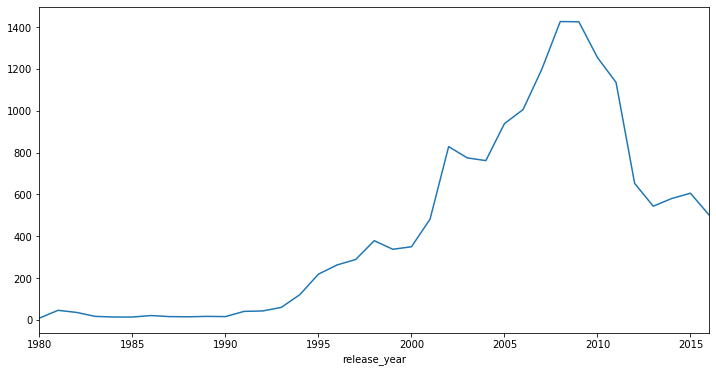

In [37]:
df[df['release_year'] > 0].groupby('release_year')['name'].agg('count').plot(figsize=(12,6))

Уже по этой сводке можно разбить временную ось на несколько периодов. С 1980 по 1993 годы выходило не более 60 игр в год. Пик пришелся как раз на 1993. С 1994 по 2001 годы выходило минимум 120 игр в год, с 2002 по 2005 - уже более 500 игр в год. За тысячу перевалили в 2006, и до 2001 года был настоящий бум: минимум 1000 релизов. А вот начиная с 2012 года обратный спад - немногим более 500 игр. Этот спад, кстати, можно объяснить развитием технологий: новые игры просто-напросто дольше прорабатывать. Что же касается неважности разных периодов - лучше ничего не отбрасывать без веских причин: даже 9 игр 1980 года важно держать в поле зрения при обработке данных.

In [40]:
df_platform = (df
               .pivot_table(index='platform', values='sales', aggfunc='sum')
               .sort_values(by='sales', ascending=False).head(10)
              )
df_platform

,sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [41]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

В топ-10 по продажам игр за все время сразу несколько поколений PS, отсутствует NES, а PC замыкает десятку.

In [42]:
title = 'Распределение продаж по годам'
colors = ['#92c6ff', '#97F0AA', '#35B815', '#F4FA58', '#DF0101', '#240B3B', '#86B404', '#2E2EFE', '#8A084B']
release_df = df[(df['release_year'] > 0) & (df['platform'].isin(top_platforms))]
col = 'sales'
release_df.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


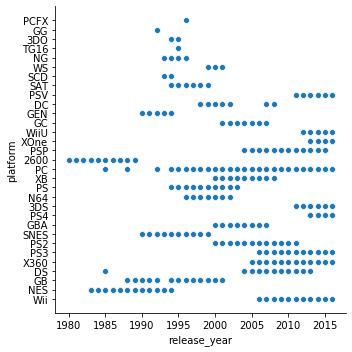

In [43]:
sns.relplot(data = df[df['release_year']>0]
            ,y = 'platform'
            ,x = 'release_year'
            )

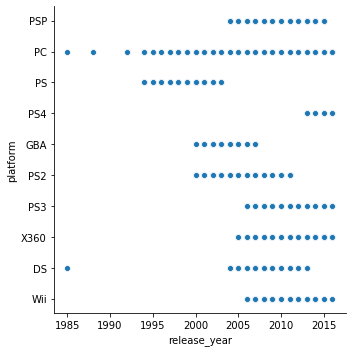

In [44]:
sns.relplot(data = release_df
            ,y = 'platform'
            ,x = 'release_year'
            )

Наглядно видно, что средний характерный срок жизни популярной платформы составляет 10 лет. Конечно, если речь идет не о стационарном компьютере. Видно, что набравшая популярность PS4 существует 4 года, так что, по идее, мы находимся в середине актуального 10-летнего периода. Однако для большей полноты лучше взять данные за предыдущие 10 лет. 

In [45]:
df_period = df[df['release_year'] > 2005]
df_period.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


Text(0.5, 1.0, 'Распределение продаж по годам')

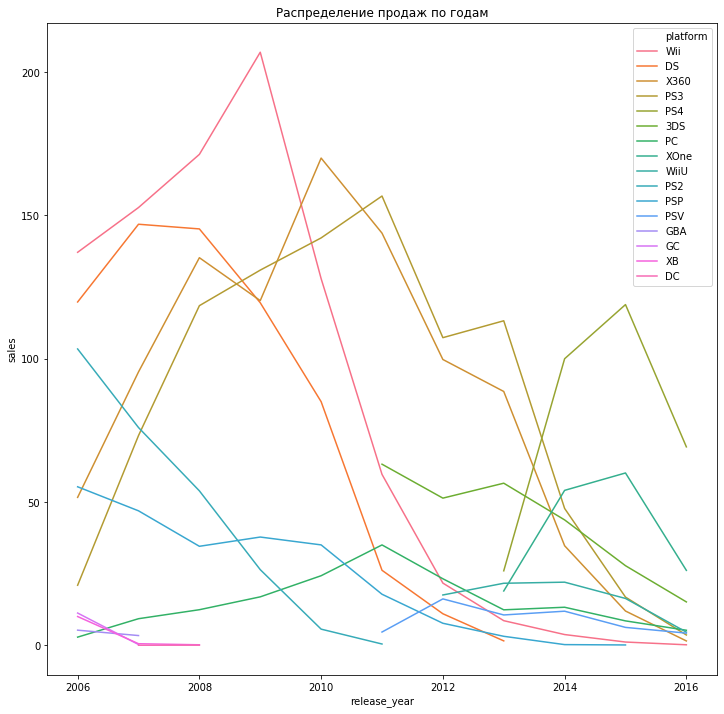

In [46]:
plt.figure(figsize=(12, 12))
(sns.lineplot(
    x='release_year',
    y='sales',
    hue='platform',
    data = df_period,
    markers=True,
    dashes=False,
    ci = None,
    estimator=sum)
    .set_title(title))

Судя по всему, снижение уровня продаж по всем платформам - это общая тенденция. Однако по крайней мере можно выделить PS4 и XOne как перспективные платформы. По состоянию на рассматриваемый момент (2016 г) именно они лидируют по объемам продаж. Нельзя отказываться и от PC - не самая прибыльная, но самая стабильная платформа. 3DS на третьем месте, остальные так или иначе на спаде и примерно на одном низком уровне.

In [47]:
top_platform = ['PS4', 'XOne', 'PC', '3DS']

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


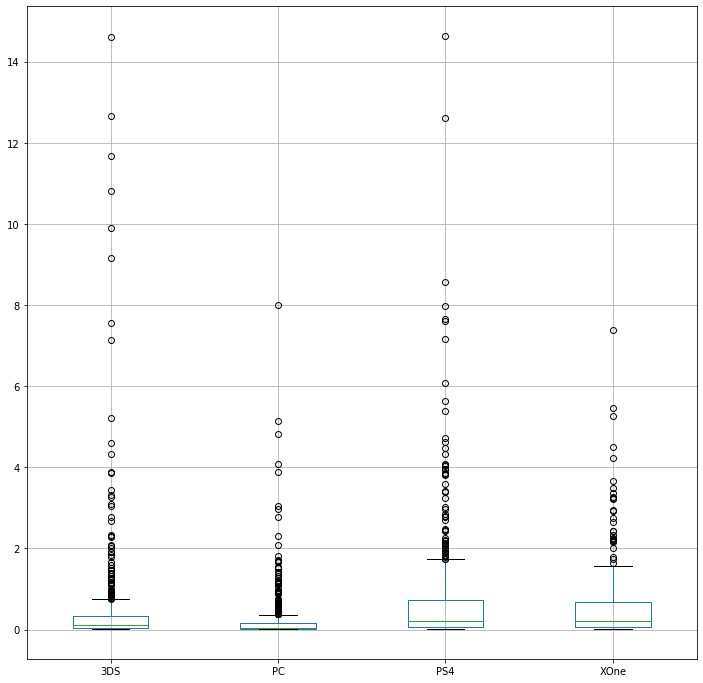

In [48]:
fig,ax = plt.subplots(figsize = (12,12))
df_period.query('platform == @top_platform').pivot_table(index=['name'], values = 'sales', columns = 'platform').boxplot(ax=ax, grid=True)
plt.show()

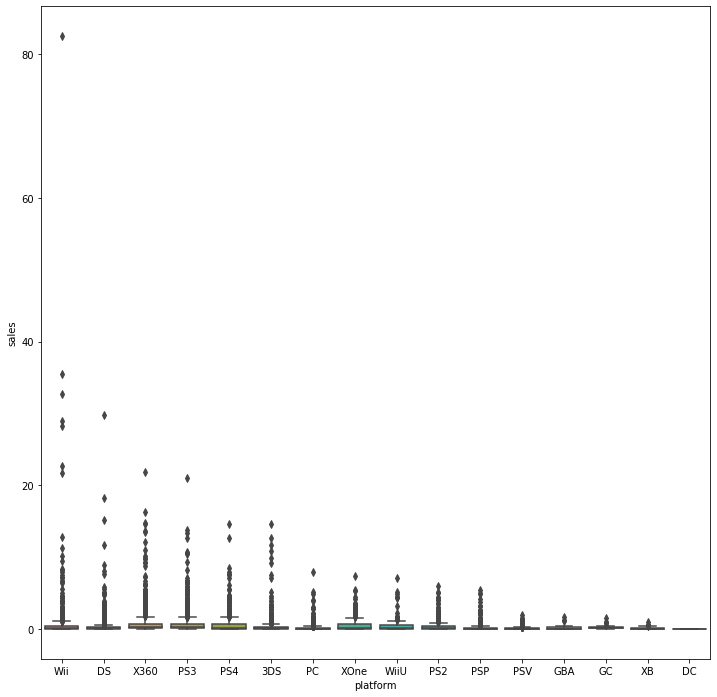

In [49]:
fig,ax = plt.subplots(figsize = (12,12))
ax = sns.boxplot(x = 'platform', y = 'sales', data = df_period)

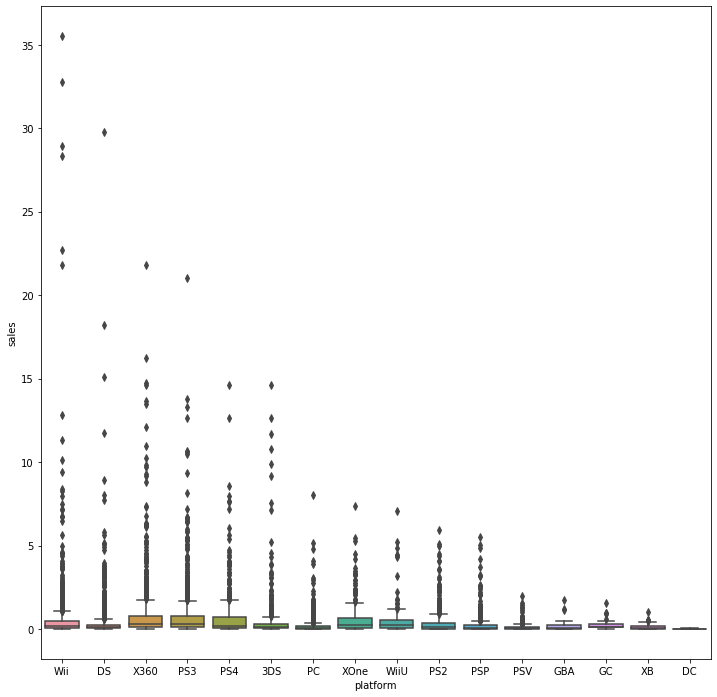

In [50]:
fig,ax = plt.subplots(figsize = (12,12))
ax = sns.boxplot(x = 'platform', y = 'sales', data = df_period[df_period['sales']<40])

Практически у всех платформ огромный разброс по продажам. За пределами "усов" масса выбросов в верхнюю сторону. Наибольший разброс - у Wii. Xone, WiiU выглядят более сбалансированными. Поэтому Wii можно оставить в рассмотрении, поскольку велика вероятность попасть далеко за пределы "усов", хотя пики продаж платформы остались в 2009 году. На DS ничего не выходит уже три года, X360 и PS3 уходят в прошлое. 

"Откусим" часть графика выше верхнего из возможных "усов", чтобы подробнее изучить среднее по платформам.

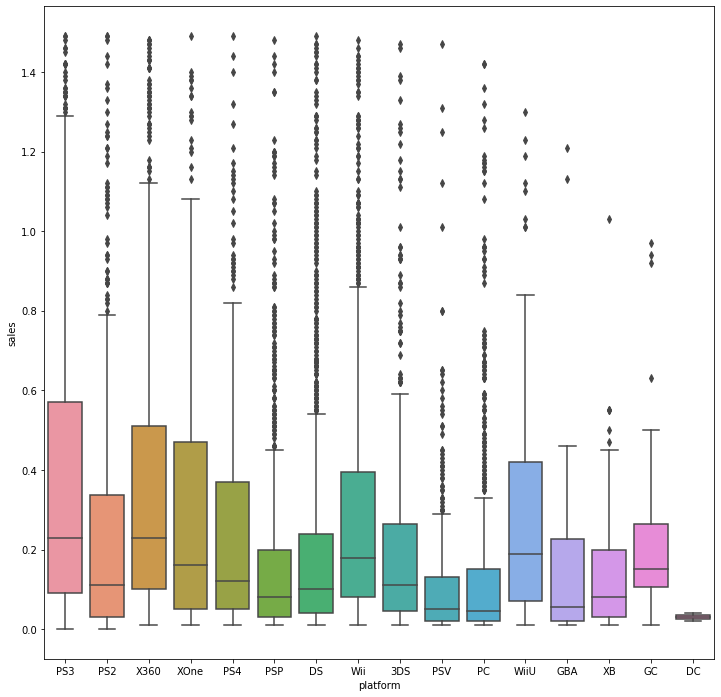

In [51]:
fig,ax = plt.subplots(figsize = (12,12))
ax = sns.boxplot(x = 'platform', y = 'sales', data = df_period[df_period['sales']<1.5])

DC - абсолютный аутсайдер среди платформ. Если не брать ее в рассмотрение, то разница в средних продажах на разных платформах не слишком велика. Тем не менее и здесь можно выделить лидеров и отстающих. PC и PSV в укрупненном масштабе проигрывают конкурентам, а PS3, X360, Wii и WiiU - в лидерах. 

PS2 возглавляет топ по продажам среди всех платформ. На ее примере посмотрим, как влияют на продажи отзывы пользователей и критиков

In [52]:
df_ps2 = df[(df['platform'] == 'PS2') & (df['user_score'] > 0)]
df_ps2.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89,8.5,E,11.65


In [53]:
df_ps2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 17 to 16591
Data columns (total 12 columns):
name            1241 non-null object
platform        1241 non-null object
release_year    1241 non-null int64
genre           1241 non-null object
na_sales        1241 non-null float64
eu_sales        1241 non-null float64
jp_sales        1241 non-null float64
other_sales     1241 non-null float64
critic_score    1241 non-null int64
user_score      1241 non-null float64
rating          1241 non-null object
sales           1241 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 126.0+ KB


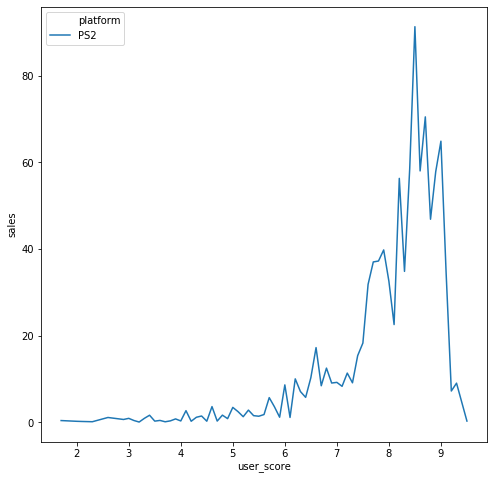

In [54]:
plt.figure(figsize=(8, 8))
(sns.lineplot(
    x='user_score',
    y='sales',
    hue='platform',
    data = df_ps2,
    markers=True,
    dashes=False,
    ci = None,
    estimator=sum)
)

Наибольшими объемами продаж могут похвастать игры с пользовательской оценкой в 8-9 баллов. Интересно, что оцененные максимальным балом игры большими объемами продаж не отличаются - но, скорее всего, их просто очень мало.

In [55]:
df[(df['platform'] == 'PS2') & (df['user_score'] > 9)]['name'].count()

48

Таких игр всего 48, и хотя среди них есть такие культовые вещи, как NFS Most Wanted, очевидно, лучшее - враг хорошего)

In [56]:
df[(df['platform'] == 'PS2') & (df['user_score'] <= 9) & (df['user_score'] >= 8)]['name'].count()

598

Что и требовалось доказать. Почти 600 игр с рейтингом близким к максимальному по объемам продаж, конечно, будут выше, чем 50 игр с высочайшим рейтингом.

In [57]:
df_ps2_critic = df[(df['platform'] == 'PS2') & (df['critic_score'] > 0)]
df_ps2_critic.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89,8.5,E,11.65


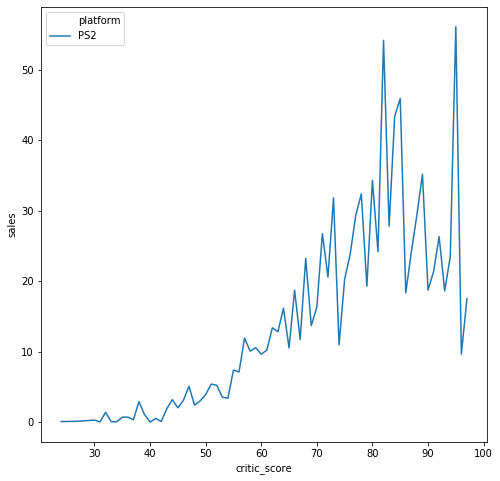

In [58]:
plt.figure(figsize=(8, 8))
(sns.lineplot(
    x='critic_score',
    y='sales',
    hue='platform',
    data = df_ps2_critic,
    markers=True,
    dashes=False,
    ci = None,
    estimator=sum)
)

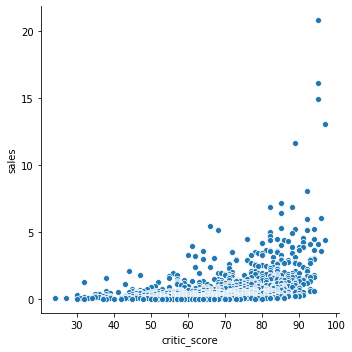

In [59]:
sns.relplot(data = df_ps2_critic
            ,y = 'sales'
            ,x = 'critic_score'
            )

В целом картина та же, но в оценках критиков шире диапазон больших продаж, причем в обе стороны. Если поделить шкалу оценок критиков на 10, то есть привести ее в соответствие со шкалой оценок пользователей, то наибольшие объемы продаж - у игр, получивших уже от 6,5 баллов и вплоть до 9,7 - чего не наблюдалось в предыдущем графике. Попробуем положить графики на одну канву.

In [60]:
df['critic_score'] = df['critic_score'] / 10
df.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name            16713 non-null object
platform        16713 non-null object
release_year    16713 non-null int64
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
other_sales     16713 non-null float64
critic_score    16713 non-null float64
user_score      16713 non-null float64
rating          16713 non-null object
sales           16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


In [62]:
df_ps2_critic = df[(df['platform'] == 'PS2') & (df['critic_score'] > 0)]
df_ps2_critic.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,9.5,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,9.5,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,9.5,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,9.7,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,8.9,8.5,E,11.65


Text(17.200000000000003, 0.5, '')

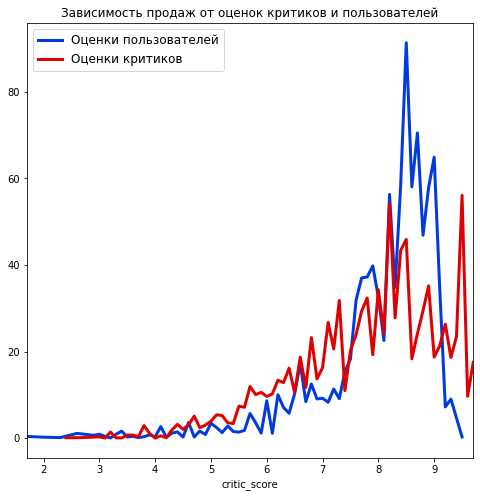

In [63]:
plt.figure(figsize=(8, 8))
title = 'Зависимость продаж от оценок критиков и пользователей'
df_ps2.groupby('user_score')['sales'].sum().plot(color='#013ADF', title=title, linewidth=3)
df_ps2_critic.groupby('critic_score')['sales'].sum().plot(color='#DF0101', title=title, linewidth=3)
plt.legend(['Оценки пользователей', 'Оценки критиков'], prop={'size':12})
ax.set_ylabel('')

Еще раз убеждаемся, что высокие продажи игр наблюдаются в более узком диапазоне оценок пользователей, чем критиков. Можно сказать, что отзывы пользователей сильнее влияют на продажи, чем оценки критиков: до 5 баллов по оценкам пользователей игры вообще почти не продаются, тогда как в этом же диапазоне оценок критиков продаж ненамного, но больше. Также можно сказать, что игру ждут хорошие продажи, если критики оценят ее от 75 баллов и выше, а пользователи - от 8 до 9 баллов включительно.

In [64]:
ps2_corr = df[df['platform'] == 'PS2']
ps2_corr = ps2_corr[(ps2_corr['critic_score'] > 0) & (ps2_corr['user_score'] > 0)]
ps2_corr = ps2_corr[['platform', 'critic_score', 'user_score', 'sales']]
ps2_corr.head()

,platform,critic_score,user_score,sales
17,PS2,9.5,9.0,20.81
24,PS2,9.5,8.7,16.15
28,PS2,9.5,8.4,14.97
38,PS2,9.7,8.5,13.10
48,PS2,8.9,8.5,11.65


In [65]:
ps2_corr.corr()

,critic_score,user_score,sales
critic_score,1.000000,0.563254,0.38922
user_score,0.563254,1.000000,0.16942
sales,0.389220,0.169420,1.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed97feea90>,
      dtype=object)

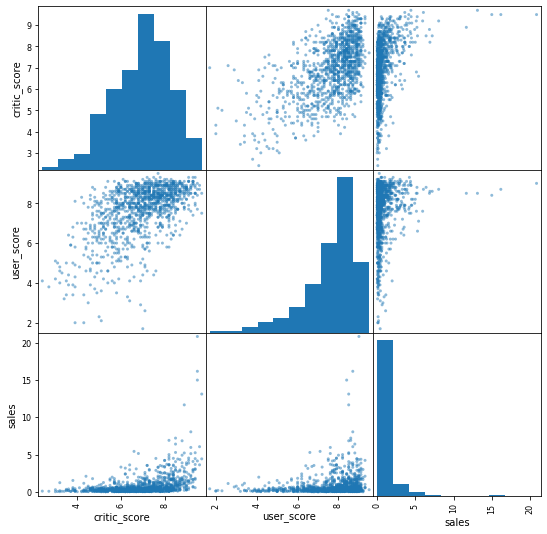

In [66]:
pd.plotting.scatter_matrix(ps2_corr, figsize = (9,9))

Тезис, высказанный выше, не подтвержден: между оценками критиков и продажами корреляция сильнее, чем между отзывами пользователей и продажами - по крайней мере для одной платформы: 0,39 и 0,17 соответственно.

In [67]:
df_corr = df[(df['critic_score'] > 0) & (df['user_score'] > 0)]
df_corr = df[['platform', 'critic_score', 'user_score', 'sales']]
df_corr.head()

,platform,critic_score,user_score,sales
0,Wii,7.6,8.0,82.54
1,NES,0.0,0.0,40.24
2,Wii,8.2,8.3,35.52
3,Wii,8.0,8.0,32.77
4,GB,0.0,0.0,31.38


In [68]:
df_corr.corr()

,critic_score,user_score,sales
critic_score,1.000000,0.794643,0.148701
user_score,0.794643,1.000000,0.139784
sales,0.148701,0.139784,1.000000


А вот картина в целом отличается: корреляция между любыми отзывами и продажами есть, но примерно одинаково невысока - 0,14-0,15. На этом фоне логично, что и корреляция между видами оценок на общей картине выше, чем по PS2. 

In [69]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [70]:
df_genre = (
    df.pivot_table(index='genre', values='sales', aggfunc='sum')
    .sort_values(by='sales', ascending=False).head(10)
)
df_genre

,sales
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


В абсолютном топе - Action, Sports, Shooter. Интересно, что вообще Action - это такой сборный жанр, который может включать в себя и шутеры, и файтинги, и платформеры, то есть по-хорошему игры жанра экшн - безоговорочные лидеры продаж с огромным отрывом. А вот замыкают рейтинги продаж самые безмятежные игры - пазлы и симуляторы.

### Вывод по третьему шагу
- на заре компьютерных игр во всем мире ежегодно выпускалось не более 60 продуктов;
- пик продуктивности игровой индустрии пришелся на десятилетие с 2001 по 2011 год: в год выходило не менее 1000 игр;
- на фоне роста требований к качеству, дизайну, геймплею и графике игр с 2012 года объем ежегодно выпускаемых игр снизился до уровня чуть более 500 в год;
- в топ-10 по продажам игр за все время сразу несколько поколений PS, отсутствует NES, а PC замыкает десятку;
- средний характерный срок жизни популярной платформы составляет 10 лет;
- начиная с 2013 года неуклонно снижается объем продаж по всем платформам, однако на этом фоне PS4 и XOne, а также с натяжкой 3DS могут считаться перспективными платформами;
- при этом наиболее стабильной платформой остается PC, поэтому персональные компьютеры также нельзя сбрасывать со счетов;
- практически все платформы, за исключением DC, грешат огромными разбросами по объемам продаж "вправо" от среднего значения;
- PS3, X360, Wii и WiiU - в лидерах по уровню среднего объема продаж;
- корреляция между любыми отзывами и продажами есть, но примерно одинаково невысока - 0,14-0,15;
- абсолютный лидер среди жанров по объему продаж - Action, да и в целом игры активных жанров (Action, Sports, Shooter) более популярны. А вот пазлы (головоломки) и симуляторы замыкают рейтинг продаж.

### Шаг 4. Портрет пользователя для каждого региона

In [71]:
platform_region_na = (
    df.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
platform_region_na.head(10)

,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40
PS,336.52
GBA,187.54
XB,186.69
N64,139.02


In [72]:
platform_region_eu = (
    df.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
platform_region_eu.head(10)

,eu_sales
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61
DS,188.89
PC,142.44
PS4,141.09
GBA,75.25


In [73]:
platform_region_jp = (
    df.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
platform_region_jp.head(10)

,jp_sales
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67
NES,98.65
GB,85.12
PS3,80.19
PSP,76.78


In [74]:
column_region = ['PS2', 'Wii', 'PS3', 'DS', 'PS']

Именно эти пять платформ есть в топ-10 всех трех основных регионов продаж

In [75]:
platform_region = df[df['platform'].isin(column_region)].reset_index()
platform_region.head()

,index,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
2,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
3,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,8.9,8.5,E,29.80
4,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,5.8,6.6,E,28.91


Text(0.5, 0, 'Платформы')

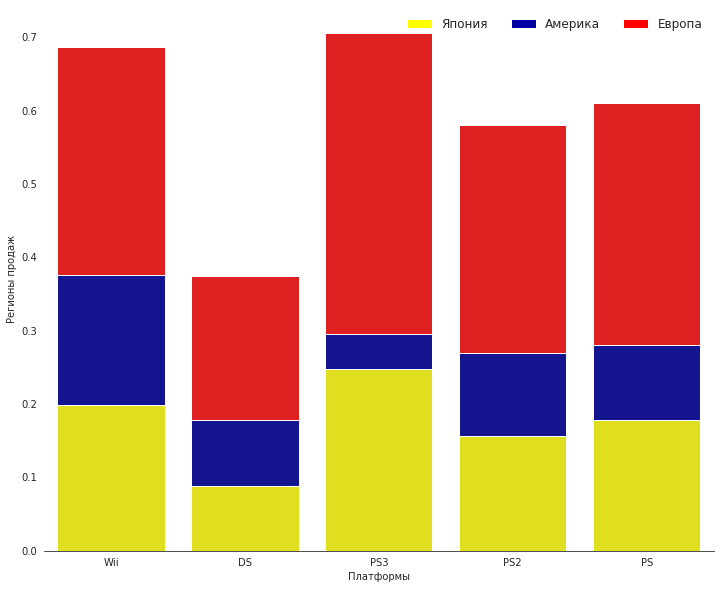

In [76]:
sns.set_style("white")
sns.set_context({"figure.figsize": (12, 10)})
sns.barplot(x = platform_region.platform, y = platform_region.sales, color = "red", ci = None)
na_plot = sns.barplot(x = platform_region.platform, y = platform_region.na_sales, color = "#0000A3", ci = None)
#eu_plot = sns.barplot(x = platform_region.platform, y = platform_region.eu_sales, color = "#01DF3A")
jp_plot = sns.barplot(x = platform_region.platform, y = platform_region.eu_sales, color = "#FFFF00", ci = None)

fullbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
nabar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
jpbar = plt.Rectangle((0,0),1,1,fc='#FFFF00',  edgecolor = 'none')
l = plt.legend([jpbar, nabar, fullbar], ['Япония', 'Америка', 'Европа'], loc=1, ncol = 3, prop={'size':12})
l.draw_frame(False)


sns.despine(left=True)
na_plot.set_ylabel("Регионы продаж")
na_plot.set_xlabel("Платформы")

Text(0.5, 0, 'Регионы продаж')

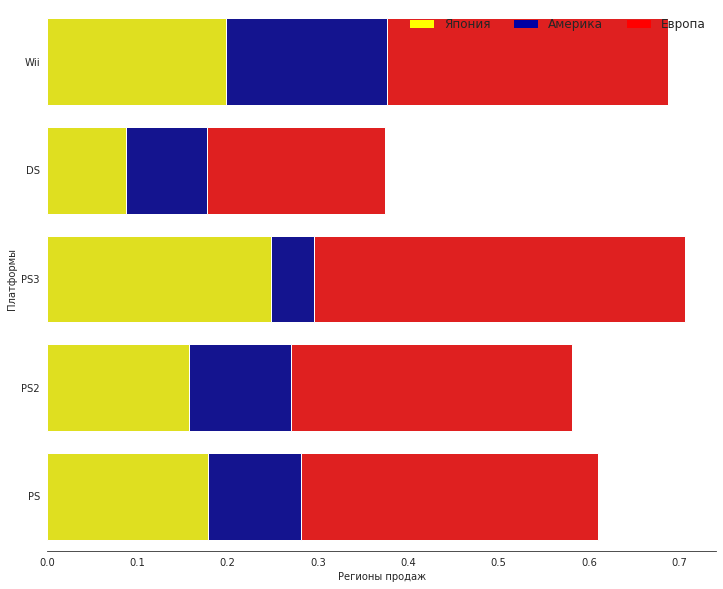

In [77]:
sns.set_style("white")
sns.set_context({"figure.figsize": (12, 10)})
sns.barplot(x = platform_region.sales, y = platform_region.platform, color = "red", ci = None)
na_plot = sns.barplot(x = platform_region.na_sales, y = platform_region.platform, color = "#0000A3", ci = None)
#eu_plot = sns.barplot(x = platform_region.platform, y = platform_region.eu_sales, color = "#01DF3A")
jp_plot = sns.barplot(x = platform_region.eu_sales, y = platform_region.platform, color = "#FFFF00", ci = None)

fullbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
nabar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
jpbar = plt.Rectangle((0,0),1,1,fc='#FFFF00',  edgecolor = 'none')
l = plt.legend([jpbar, nabar, fullbar], ['Япония', 'Америка', 'Европа'], loc=1, ncol = 3, prop={'size':12})
l.draw_frame(False)


sns.despine(left=True)
na_plot.set_ylabel("Платформы")
na_plot.set_xlabel("Регионы продаж")

In [78]:
pivot = platform_region.pivot_table(index = 'platform', values = ['jp_sales', 'na_sales', 'eu_sales', 'sales'], aggfunc = 'sum')
pivot

,eu_sales,jp_sales,na_sales,sales
platform,,,,
DS,188.89,175.57,382.40,806.12
PS,213.61,139.82,336.52,730.86
PS2,339.29,139.20,583.84,1255.77
PS3,330.29,80.19,393.49,939.65
Wii,262.21,69.33,496.90,907.51


In [79]:
pivot.columns = ['EU', 'JP', 'NA', 'Total']
pivot

,EU,JP,NA,Total
platform,,,,
DS,188.89,175.57,382.40,806.12
PS,213.61,139.82,336.52,730.86
PS2,339.29,139.20,583.84,1255.77
PS3,330.29,80.19,393.49,939.65
Wii,262.21,69.33,496.90,907.51


In [80]:
pivot = pivot.sort_values(by = 'Total', ascending = False)
pivot

,EU,JP,NA,Total
platform,,,,
PS2,339.29,139.20,583.84,1255.77
PS3,330.29,80.19,393.49,939.65
Wii,262.21,69.33,496.90,907.51
DS,188.89,175.57,382.40,806.12
PS,213.61,139.82,336.52,730.86


In [81]:
pivot['EU%'] = pivot['EU'] / pivot['EU'].sum()
pivot['JP%'] = pivot['JP'] / pivot['JP'].sum()
pivot['NA%'] = pivot['NA'] / pivot['NA'].sum()
pivot = pivot.drop(['EU', 'JP', 'NA', 'Total'], axis=1)
pivot

,EU%,JP%,NA%
platform,,,
PS2,0.254285,0.230422,0.266211
PS3,0.247540,0.132741,0.179418
Wii,0.196516,0.114764,0.226569
DS,0.141566,0.290626,0.174361
PS,0.160093,0.231448,0.153441


In [82]:
for country in range (0,3):
    i = 0
    for platform in range(0,len(pivot)):
        i += pivot.iloc[platform,country]
        pivot.iloc[platform,country] = i

In [83]:
pivot = pivot.transpose()
pivot = pivot.reset_index()
pivot.columns = ['platform', 'PS2', 'PS3', 'Wii', 'DS', 'PS']
pivot

,platform,PS2,PS3,Wii,DS,PS
0,EU%,0.254285,0.501825,0.698341,0.839907,1.0
1,JP%,0.230422,0.363162,0.477926,0.768552,1.0
2,NA%,0.266211,0.445628,0.672198,0.846559,1.0


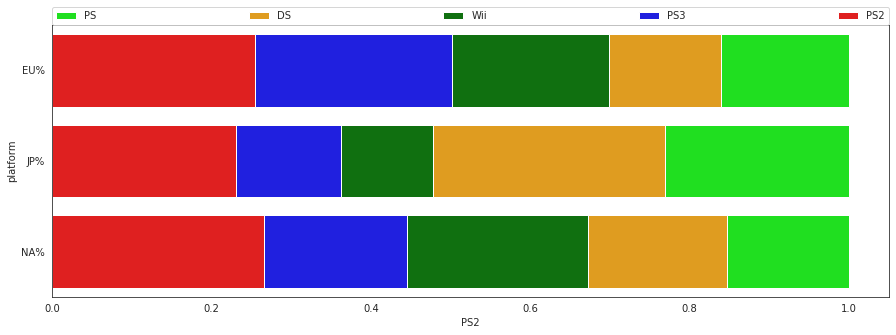

In [84]:
colours = ['red', 'blue', 'green', 'orange', 'lime']
f, ax = plt.subplots(figsize=(15, 5))
for j in range (0,5):
    i = 4 - j
    sns.barplot(x = pivot.columns[i+1], y='platform', data=pivot, label=pivot.columns[i+1], color=colours[i])
ax.legend (loc=(0.0, 1.0),mode='expand',borderaxespad=0,ncol=5)

Итак, в Европе и Америке самая большая доля - у PS2, более четверти из самых распространенных платформ. В Японии же лидирует DS. Интересно, что вторая по популярности в Европе и Америке Wii замыкает японский рейтинг - у нее чуть больше 10%, а ведь это японский продукт. Вероятно, это связано с такой особенностью японского бизнеса, как разделение продуктов на предназначенные для внутреннего рынка и экспортные. В автомобилестроении ситуация точно такая же - вероятно, и в игровой индустрии те же принципы.

In [85]:
pivot_genre = (
    df
    .pivot_table(index = 'genre', values = ['jp_sales', 'na_sales', 'eu_sales', 'sales'], aggfunc = 'sum')
    .sort_values(by = 'sales', ascending = False)
)
pivot_genre

,eu_sales,jp_sales,na_sales,sales
genre,,,,
Action,519.13,161.43,879.01,1744.17
Sports,376.79,135.54,684.43,1331.27
Shooter,317.34,38.76,592.24,1052.45
Role-Playing,188.71,355.41,330.81,934.56
Platform,200.35,130.83,445.50,827.77
Misc,212.74,108.11,407.27,802.51
Racing,236.51,56.71,359.35,728.67
Fighting,100.33,87.48,223.36,447.53
Simulation,113.52,63.80,181.92,389.97


In [86]:
genre_column = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']

In [87]:
pivot_genre = pivot_genre.head()
pivot_genre

,eu_sales,jp_sales,na_sales,sales
genre,,,,
Action,519.13,161.43,879.01,1744.17
Sports,376.79,135.54,684.43,1331.27
Shooter,317.34,38.76,592.24,1052.45
Role-Playing,188.71,355.41,330.81,934.56
Platform,200.35,130.83,445.50,827.77


In [88]:
pivot_genre['EU%'] = pivot_genre['eu_sales'] / pivot_genre['eu_sales'].sum()
pivot_genre['JP%'] = pivot_genre['jp_sales'] / pivot_genre['jp_sales'].sum()
pivot_genre['NA%'] = pivot_genre['na_sales'] / pivot_genre['na_sales'].sum()
pivot_genre = pivot_genre.drop(['eu_sales', 'jp_sales', 'na_sales', 'sales'], axis=1)
pivot_genre

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,EU%,JP%,NA%
genre,,,
Action,0.323986,0.196394,0.299800
Sports,0.235153,0.164897,0.233435
Shooter,0.198050,0.047155,0.201993
Role-Playing,0.117773,0.432388,0.112828
Platform,0.125037,0.159166,0.151945


In [89]:
for country in range (0,3):
    i = 0
    for genre in range(0,len(pivot_genre)):
        i += pivot_genre.iloc[genre,country]
        pivot_genre.iloc[genre,country] = i

In [90]:
pivot_genre = pivot_genre.transpose()
pivot_genre = pivot_genre.reset_index()
pivot_genre.columns = ['genre', 'Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']
pivot_genre

,genre,Action,Sports,Shooter,Role-Playing,Platform
0,EU%,0.323986,0.559139,0.757190,0.874963,1.0
1,JP%,0.196394,0.361291,0.408446,0.840834,1.0
2,NA%,0.299800,0.533235,0.735228,0.848055,1.0


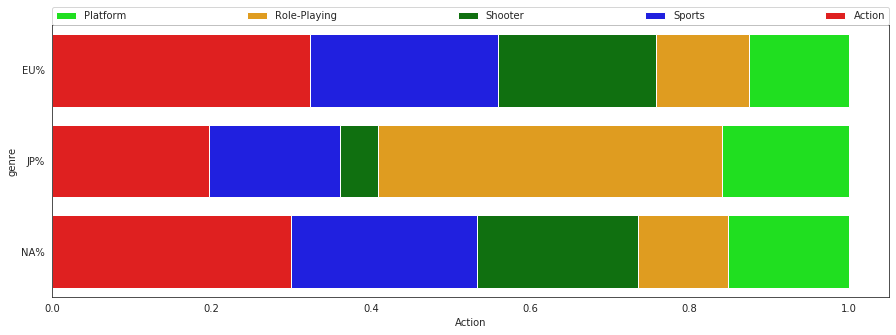

In [91]:
colours = ['red', 'blue', 'green', 'orange', 'lime']
f, ax = plt.subplots(figsize=(15, 5))
for j in range (0,5):
    i = 4 - j
    sns.barplot(x = pivot_genre.columns[i+1], y='genre', data=pivot_genre, label=pivot_genre.columns[i+1], color=colours[i])
ax.legend (loc=(0.0, 1.0),mode='expand',borderaxespad=0,ncol=5)

Видим, что Action безоговорочно лидирует только в Европе и Америке; а в Японии снова свои расклады: там с большим отрывом лидирует РПГ. Скорее всего, это связано с культурными особенностями и продавцам нужно просто иметь в виду этот момент. В Европе и Америке РПГ замыкает топ-5 популярных жанров. В Японии аутсайдером выступают шутеры, что неудивительно, зная непопулярность там Action-игр. 

In [92]:
pivot_rate = (
    df[df['rating'] != 0]
    .pivot_table(index = 'rating', values = ['jp_sales', 'na_sales', 'eu_sales', 'sales'], aggfunc = 'sum')
    .sort_values(by = 'sales', ascending = False)
)
pivot_rate

,eu_sales,jp_sales,na_sales,sales
rating,,,,
E,710.25,198.11,1292.99,2435.52
T,427.03,151.40,759.75,1493.35
M,483.97,64.24,748.48,1473.79
E10+,188.52,40.20,353.32,655.60
K-A,0.27,1.46,2.56,4.32
AO,0.61,0.00,1.26,1.96
EC,0.11,0.00,1.53,1.75
RP,0.08,0.00,0.00,0.09


In [93]:
pivot_rate = pivot_rate.head(4)
pivot_rate

,eu_sales,jp_sales,na_sales,sales
rating,,,,
E,710.25,198.11,1292.99,2435.52
T,427.03,151.40,759.75,1493.35
M,483.97,64.24,748.48,1473.79
E10+,188.52,40.20,353.32,655.60


- «EC» («Early childhood») — «Для детей младшего возраста» Игра подходит для детей от 3 лет и старше
- «E» («Everyone») — «Для всех» Содержание вполне подходит для возрастной категории от 6 лет и старше, Первоначально "K-A" ("Kids to Adults")
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет
- «RP» («Rating Pending») — «Рейтинг ожидается»

Во всех трех основных регионах по продажам лидируют игры с маркировкой Е. Только в Европе игры с маркировкой М на втором месте про продажам, все остальные позиции в целом упорядочены как в таблице. Таким образом, возрастной диапазон от 6 до 18 лет - зона наибольших суммарных продаж вне зависимости от региона. Откровенно взрослые и рассчитанные исключительно на малышей игры продаются на уровне погрешности.

### Шаг 5. Проверка гипотез

Гипотеза Н0: средние пользовательские рейтинги платформ Xbox One и PC одинаковы. Альтернативная гипотеза: указанные рейтинги отличаются.

In [94]:
df_users = df[df['user_score'] > 0]
df_users.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,8.9,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,5.8,6.6,E,28.91


In [95]:
alpha = .01
results = st.ttest_ind(
    df_users[df_users['platform'] == 'XOne']['user_score'], 
    df_users[df_users['platform'] == 'PC']['user_score']
)
print('p-значение', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Text(0, 0.5, '')

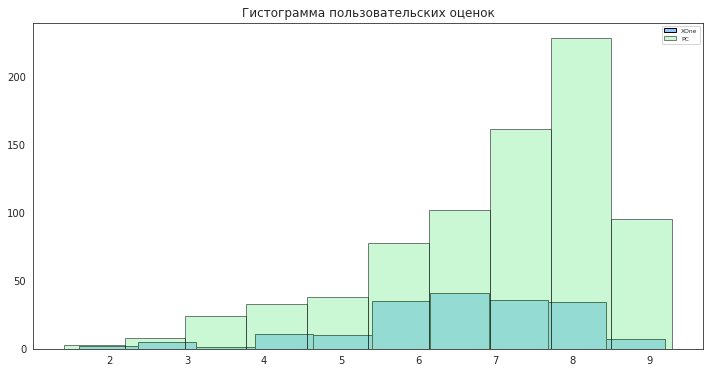

In [96]:
ax = plt.gca()
column = 'user_score'
title = 'Гистограмма пользовательских оценок'
df_users[df_users['platform'] == 'XOne'][column].plot(kind='hist', bins=10, figsize=(12,6), 
                                                                    ec='black', ax=ax, color='#92c6ff', 
                                                                    title=title)
df_users[df_users['platform'] == 'PC'][column].plot(kind='hist', bins=10, figsize=(12,6), 
                                                                    ec='black', ax=ax, color='#97F0AA', 
                                                                    title=title, alpha=0.5)

plt.legend(['XOne', 'PC'], prop={'size':6})
ax.set_ylabel('')

Даже если установить пороговое значение как 1%, вероятность получить наблюдаемый результат при условии верности нулевой гипотезы слишком мала, поэтому мы ее отвергаем. Таким образом, средние пользовательские рейтинги платформ Xbox One и PC статистически отличаются.

Гипотеза Н0: средние пользовательские рейтинги жанров Action и Sports одинаковы. Альтернативная гипотеза: указанные рейтинги отличаются.

In [97]:
alpha = .05
results = st.ttest_ind(
    df_users[df_users['genre'] == 'Action']['user_score'], 
    df_users[df_users['genre'] == 'Sports']['user_score']
)
print('p-значение', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


Text(0, 0.5, '')

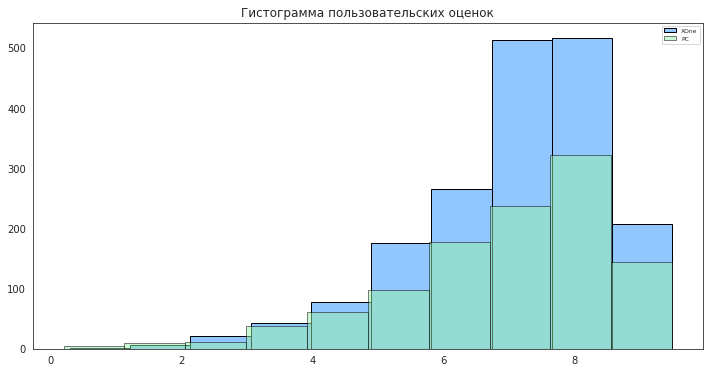

In [98]:
ax = plt.gca()
column = 'user_score'
title = 'Гистограмма пользовательских оценок'
df_users[df_users['genre'] == 'Action'][column].plot(kind='hist', bins=10, figsize=(12,6), 
                                                                    ec='black', ax=ax, color='#92c6ff', 
                                                                    title=title)
df_users[df_users['genre'] == 'Sports'][column].plot(kind='hist', bins=10, figsize=(12,6), 
                                                                    ec='black', ax=ax, color='#97F0AA', 
                                                                    title=title, alpha=0.5)

plt.legend(['XOne', 'PC'], prop={'size':6})
ax.set_ylabel('')

Гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports отвергнуть не получилось. Распределения очень похожи и на графике, и вероятность получить наблюдаемое соотношение при условии правильности нулевой гипотезы более 10%, поэтому исходя из имеющихся данных эту гипотезу отвергнуть нельзя.

### Шаг 6. Общий вывод

В результате обработки исходных данных получили таблицу, пригодную к дальнейшему изучению. В ходе исследований были выявлены следующие тенденции и закономерности:

- с 2012 года объем ежегодно выпускаемых игр снизился до уровня чуть более 500 в год;
- топ-10 по продажам игр за все время сразу несколько поколений PS, отсутствует NES, а PC замыкает десятку (хотя в Японии по-прежнему популярны NES и производные);
- средний характерный срок жизни популярной платформы составляет 10 лет;
- перспективными для ближайшего будущего платформами можно признать PS4 и XOne, а также 3DS;
- наиболее стабильной платформой остается PC, поэтому персональные компьютеры также нельзя сбрасывать со счетов;
- PS3, X360, Wii и WiiU - в лидерах по уровню среднего объема продаж;
- корреляция между любыми отзывами и продажами есть, но примерно одинаково невысока - 0,14-0,15;
- тем не менее и здесь есть особенности: можно сказать, что игру ждут уверенные продажи, если критики оценят ее от 60 баллов и выше, а пользователи - от 7 до 9 баллов включительно. Не рекордные, не блестящие - но уверенные;
- абсолютный лидер среди жанров по объему продаж - Action, да и в целом игры активных жанров (Action, Sports, Shooter) более популярны. А вот пазлы (головоломки, стратегии) и симуляторы замыкают рейтинг продаж;
- американцы и европейцы обладают схожими предпочтениями в том, что касается платформ и жанров. Из платформ они предпочитают PS2, на втором месте PS3 в Европе и Wii в Америке (а третьи места распределены наоборот). PS там и там на четвертых местах, а DS замыкает пятерку. Японцы же предпочитают именно DS, потом PS различных поколений, а Wii осталась на последнем месте в топ-5;

- жанровые предпочтения американцев и европейцев также схожи: на первом месте Action, далее спорт, шутеры, платформеры и РПГ. А вот японцы с большим отрывом предпочитают именно РПГ и лишь потом все остальное, причем шутеры замыкают пятерку;

- рейтинги ESRB существенного влияния на продажи по регионам не оказывают. Везде лидируют игры для возраста от 6 лет и старше, а на втором месте только у европейцев - игры, не предназначенные для лиц младше 17 лет, а у американцев и японцев - игры для подростков и старше. Игры для самых маленьких и только для взрослых замыкают рейтинги продаж вне зависимости от региона;

- проверка гипотезы о равенстве средних пользовательских оценок для платформ Xone и PC показала, что статистически они отличаются;

- напротив, не обнаружилось оснований полагать, что средние пользовательские оценки жанров экшн и спортс статистически различны - наоборот, они совпадают с высокой долей вероятности.
